In [1]:
from czibench.runner import ContainerRunner
from czibench.tasks.sc import ClusteringTask, EmbeddingTask
from czibench.datasets.utils import load_dataset

In [2]:
dataset = load_dataset("example", config_path="custom.yaml")

In [3]:
runner = ContainerRunner(
    image="czibench-scvi:latest",
    gpu=True,
)

dataset = runner.run(dataset)

2025-01-28 18:14:42,737 - czibench.models.base - INFO - Loading data...
2025-01-28 18:14:43,134 - czibench.models.base - INFO - Data loaded successfully
2025-01-28 18:14:43,134 - czibench.models.base - INFO - Validating data...
2025-01-28 18:14:43,143 - czibench.models.base - INFO - Data validated successfully
2025-01-28 18:14:43,143 - czibench.models.base - INFO - Running model...
2025-01-28 18:14:43,509 - utils - INFO - WARNING:3072 HVGs are not present in the AnnData object
2025-01-28 18:14:43,730 - botocore.credentials - INFO - Found credentials from IAM Role: atar-ssm
2025-01-28 18:14:44,147 - botocore.httpchecksum - INFO - Skipping checksum validation. Response did not contain one of the following algorithms: ['crc32', 'sha1', 'sha256'].
2025-01-28 18:14:44,448 - botocore.httpchecksum - INFO - Skipping checksum validation. Response did not contain one of the following algorithms: ['crc32', 'sha1', 'sha256'].
2025-01-28 18:14:44,506 - botocore.httpchecksum - INFO - Skipping checks

In [4]:
from czibench.tasks.sc import ClusteringTask, EmbeddingTask, BatchIntegrationTask


task = ClusteringTask(label_key="cell_type")
dataset, clustering_results = task.run(dataset)

task = EmbeddingTask(label_key="cell_type")
dataset, embedding_results = task.run(dataset)

task = BatchIntegrationTask(batch_key="dataset_id")
dataset, batch_integration_results = task.run(dataset)

embedding shape: (15867, 50)
batch labels shape: (15867,)
indices shape: (15867, 200)
unique batch labels shape: (1,)
indices batch shape: (15867, 200)


In [14]:
batch_integration_results

{'entropy_per_cell': array([0., 0., 0., ..., 0., 0., 0.])}

In [ ]:
dataset.adata.obs["entropy_per_cell"] = batch_integration_results["entropy_per_cell"]
import scanpy as sc
import matplotlib.pyplot as plt

# Plot UMAP with entropy coloring
sc.pl.umap(
    dataset.adata,
    color='entropy_per_cell',
    cmap='viridis',  # Choose a colormap that suits your data
    title='Entropy per Cell',
    size=10,
    show=True
)

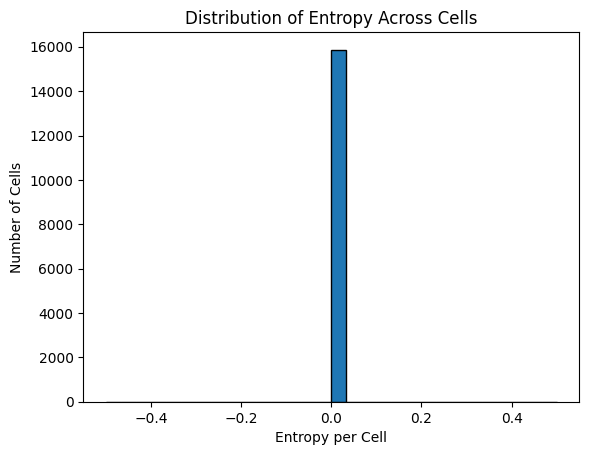

In [15]:
import matplotlib.pyplot as plt

plt.hist(batch_integration_results["entropy_per_cell"], bins=30, edgecolor='k')
plt.xlabel('Entropy per Cell')
plt.ylabel('Number of Cells')
plt.title('Distribution of Entropy Across Cells')
plt.show()

In [9]:
clustering_results

{'adjusted_rand_index': 0.3116003743215567,
 'normalized_mutual_info': np.float64(0.48465770909669675)}

In [7]:
embedding_results

{'silhouette_score': np.float32(0.026767414)}

In [ ]:
import scanpy as sc
sc.tl.umap(dataset.adata)
sc.pl.umap(dataset.adata, color="cell_type")
